## 手写识别的例子

In [1]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [2]:
import numpy as np
noisy_digits = X + np.random.normal(0,4,size=X.shape)

In [3]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1,10):
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits,X_num])

In [4]:
example_digits

array([[ -6.12191476,  -0.08235729,   7.53742016, ..., -10.49385468,
         -2.89018758,   3.61104708],
       [-10.82517419,  -2.4881466 ,  -2.01608093, ...,   5.17980499,
          5.0183588 ,  -1.48996269],
       [ -3.46711274,  -4.52848836,   0.20772612, ...,   4.8267243 ,
         -2.17767432,  -4.06512148],
       ...,
       [-10.51006787,   1.40656638,  12.0959791 , ...,   9.160224  ,
         -0.36239342,  -6.02797562],
       [  0.23009848,  -7.47496466,   8.56164817, ...,   7.28204181,
         -8.12986427,  -5.61735387],
       [ -6.80325942,  -1.44461084,   6.2976683 , ...,   5.3871382 ,
          6.3768767 ,   0.49930938]])

In [8]:
example_digits.shape
import matplotlib.pyplot as plt

In [9]:
def plot_digits(data):
    fig,axes = plt.subplots(10,10,figsize=(10,10),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw = dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap='binary',interpolation='nearest',clim=(0,16))    

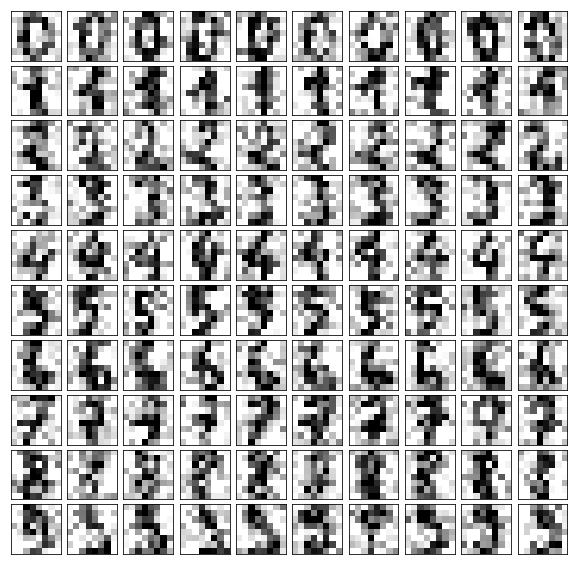

In [10]:
plot_digits(example_digits)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(0.5)

In [13]:
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.n_components_

12

In [16]:
compnents = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(compnents)

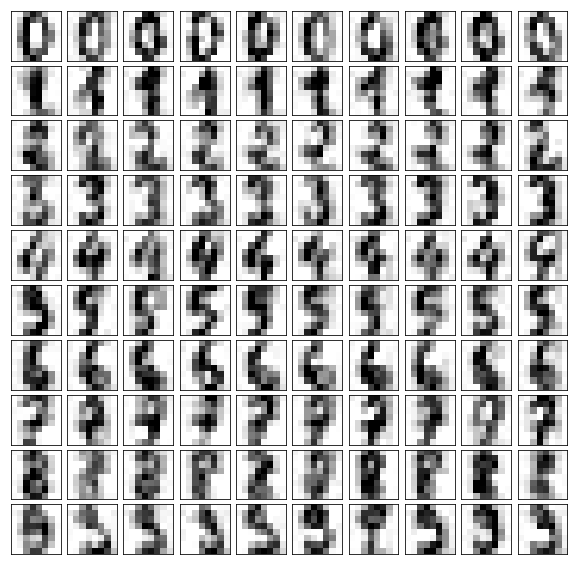

In [17]:
plot_digits(filtered_digits)